<a href="https://colab.research.google.com/github/hjhan1201/AIFFEL_Online_Quest/blob/main/DeepLearning_OneQ6_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000): # 아래 imdb.load_data의 num_words를 10000으로 설정할 예정이기 때문에 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 output (Dense)              (None, 1)                 129       
                                                                 
Total params: 1296769 (4.95 MB)
Trainable params: 1296769 (4.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 6s 124ms/step - loss: 0.4518 - accuracy: 0.7940 - val_loss: 0.3054 - val_accuracy: 0.8780
Epoch 2/30
49/49 [==============================] - 3s 62ms/step - loss: 0.2707 - accuracy: 0.8926 - val_loss: 0.2726 - val_accuracy: 0.8898
Epoch 3/30
49/49 [==============================] - 3s 62ms/step - loss: 0.2096 - accuracy: 0.9177 - val_loss: 0.3078 - val_accuracy: 0.8733
Epoch 4/30
49/49 [==============================] - 3s 67ms/step - loss: 0.1753 - accuracy: 0.9312 - val_loss: 0.2833 - val_accuracy: 0.8853
Epoch 5/30
49/49 [==============================] - 3s 61ms/step - loss: 0.1435 - accuracy: 0.9455 - val_loss: 0.3316 - val_accuracy: 0.8752
Epoch 6/30
49/49 [==============================] - 3s 62ms/step - loss: 0.1118 - accuracy: 0.9578 - val_loss: 0.5542 - val_accuracy: 0.8157
Epoch 7/30
49/49 [==============================] - 4s 82ms/step - loss: 0.0929 - accuracy: 0.9659 - val_loss: 0.3434 - val_accuracy: 0.8780
Epoch 8/30
4

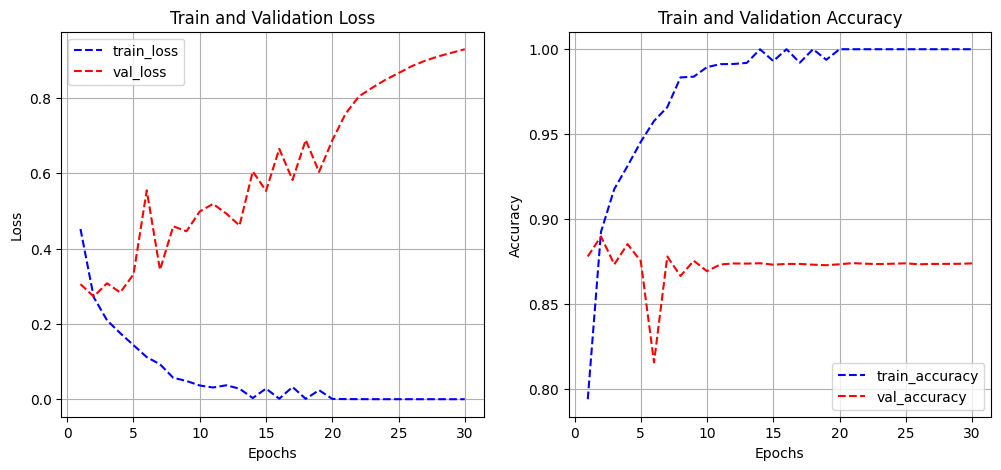

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [5]:
# b_model = models.Sequential()
# b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
# b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
# b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
# b_model.compile(optimizer='rmsprop',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])
# b_model.summary()

In [6]:
# b_model_history = b_model.fit(x_train, y_train,
#                               epochs=30,
#                               batch_size=512,
#                               validation_data=(x_test, y_test))

In [7]:
# b_history_dict = b_model_history.history

# b_loss = b_history_dict['loss']
# b_val_loss = b_history_dict['val_loss']
# epochs = range(1, len(b_loss) + 1)

# fig = plt.figure(figsize=(12, 5))

# ax1 = fig.add_subplot(1, 2, 1)
# ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
# ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
# ax1.plot(epochs, loss, 'b--', label='train_loss')
# ax1.plot(epochs, val_loss, 'r--', label='val_loss')
# ax1.set_title('Train and Validation Loss')
# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss')
# ax1.grid()
# ax1.legend()

# b_accuracy = b_history_dict['accuracy']
# b_val_accuracy = b_history_dict['val_accuracy']

# ax2 = fig.add_subplot(1, 2, 2)
# ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
# ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
# ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
# ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
# ax2.set_title('Train and Validation Accuracy')
# ax2.set_xlabel('Epochs')
# ax2.set_ylabel('Accuracy')
# ax2.grid()
# ax2.legend()

# plt.show()

In [8]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu',
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 64ms/step - loss: 3.7108 - accuracy: 0.5844 - val_loss: 1.9126 - val_accuracy: 0.7327
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 1.8457 - accuracy: 0.6471 - val_loss: 1.7784 - val_accuracy: 0.6490
Epoch 3/30
49/49 [==============================] - 1s 19ms/step - loss: 1.7408 - accuracy: 0.6998 - val_loss: 1.7047 - val_accuracy: 0.7166
Epoch 4/30
49/49 [==============================] - 1s 20ms/step - loss: 1.6555 - accuracy: 0.7232 - val_loss: 1.6041 - val_accuracy: 0.7490
Epoch 5/30
49/49 [==============================] - 1s 19ms/step - loss: 1.5792 - accuracy: 0.7447 - val_loss: 1.5527 - val_accuracy: 0.7526
Epoch 6/30
49/49 [==============================] - 1s 19ms/step - loss: 1.5129 - accuracy: 0.7637 - val_loss: 1.4729 - val_accuracy: 0.7706
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 1.4575 - accuracy: 0.7793 - val_loss: 1.4443 - val_accuracy: 0.7826
Epoch 8/30
49

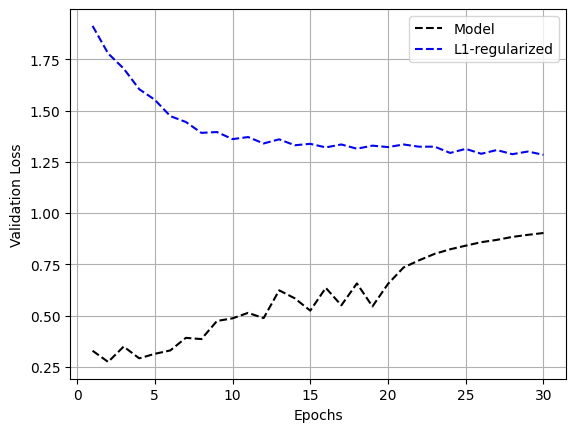

In [10]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [5]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu',
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 3s 52ms/step - loss: 0.7332 - accuracy: 0.8091 - val_loss: 0.5684 - val_accuracy: 0.8721
Epoch 2/30
49/49 [==============================] - 1s 19ms/step - loss: 0.5208 - accuracy: 0.8812 - val_loss: 0.5011 - val_accuracy: 0.8797
Epoch 3/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4689 - accuracy: 0.8896 - val_loss: 0.4781 - val_accuracy: 0.8788
Epoch 4/30
49/49 [==============================] - 1s 25ms/step - loss: 0.4430 - accuracy: 0.8920 - val_loss: 0.4553 - val_accuracy: 0.8812
Epoch 5/30
49/49 [==============================] - 1s 18ms/step - loss: 0.4229 - accuracy: 0.8972 - val_loss: 0.4667 - val_accuracy: 0.8670
Epoch 6/30
49/49 [==============================] - 1s 25ms/step - loss: 0.4117 - accuracy: 0.8971 - val_loss: 0.4363 - val_accuracy: 0.8806
Epoch 7/30
49/49 [==============================] - 1s 19ms/step - loss: 0.4013 - accuracy: 0.9004 - val_loss: 0.4277 - val_accuracy: 0.8828
Epoch 8/30
49

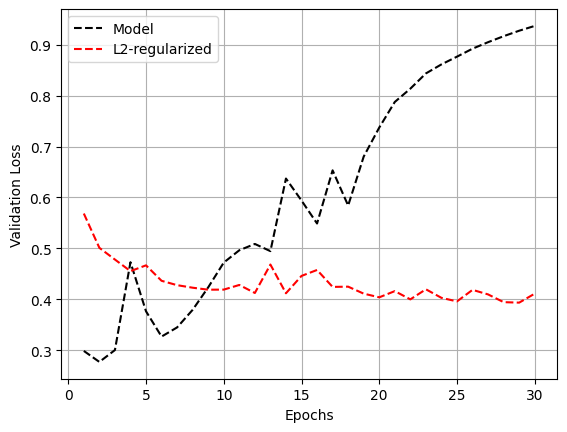

In [11]:
import matplotlib.pyplot as plt

l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

In [5]:
l1_l2_model =  models.Sequential()
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer='l1_l2',
                             activation='relu', input_shape=(10000, )))
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer='l1_l2',
                             activation='relu'))
l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160305 (626.19 KB)
Trainable params: 160305 (626.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 [==============================] - 4s 62ms/step - loss: 3.9030 - accuracy: 0.5501 - val_loss: 2.0450 - val_accuracy: 0.5000
Epoch 2/30
49/49 [==============================] - 1s 20ms/step - loss: 1.9585 - accuracy: 0.6016 - val_loss: 1.8774 - val_accuracy: 0.6936
Epoch 3/30
49/49 [==============================] - 1s 20ms/step - loss: 1.8298 - accuracy: 0.5878 - val_loss: 1.7798 - val_accuracy: 0.6193
Epoch 4/30
49/49 [==============================] - 1s 24ms/step - loss: 1.7238 - accuracy: 0.5820 - val_loss: 1.6694 - val_accuracy: 0.5000
Epoch 5/30
49/49 [==============================] - 1s 24ms/step - loss: 1.6397 - accuracy: 0.5280 - val_loss: 1.6110 - val_accuracy: 0.5008
Epoch 6/30
49/49 [==============================] - 1s 23ms/step - loss: 1.5751 - accuracy: 0.5119 - val_loss: 1.5426 - val_accuracy: 0.5361
Epoch 7/30
49/49 [==============================] - 1s 20ms/step - loss: 1.5290 - accuracy: 0.5034 - val_loss: 1.5170 - val_accuracy: 0.5000
Epoch 8/30
49

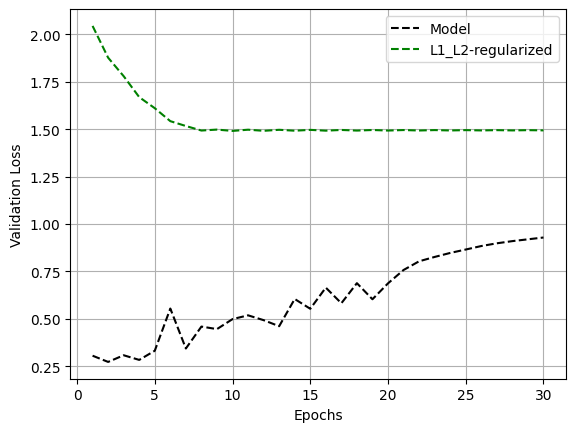

In [14]:
import matplotlib.pyplot as plt


loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

NameError: ignored

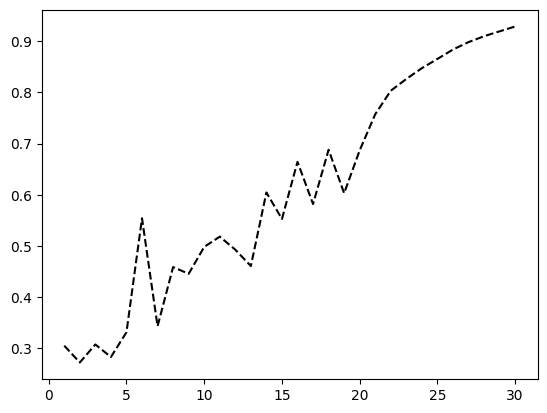

In [15]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()